In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("new_data.csv")
print(df.shape)
df.head()

(4754, 85)


,Unnamed: 0,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,0,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,1,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,2,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,3,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,4,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


In [3]:
df=df.drop('Unnamed: 0',axis=1)
df.columns

Index(['low_volume_percent', 'middle_volume_percent',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'student_feature',
       'repayment_capability', 'is_high_user', 'number_of_trans_from_2011',
       'first_transaction_time', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_month',
       'trans_fail_top_count_enum_last_6_month',
      

# 特征衍生
1. 加减乘除
2. 统计特征
3. 连续值离散化分类特征

In [4]:
df['query_org_count'].unique()

array([ 8.,  7., 11., 12., 14., 10., nan,  9.,  5., 24., 13.,  6., 20.,
       15., 19., 17., 21., 37.,  4., 32.,  1., 16., 18., 22.,  3.,  2.,
       35., 28., 43., 34., 25., 23., 29., 26., 33., 31., 27., 30., 49.,
       41., 36., 40., 38., 39., 45., 44., 54.])

In [5]:
# for col in df.columns:
#     print(col,df[col].unique())
df['trans_top_time_last_7_month']=df['trans_top_time_last_1_month']+df['trans_top_time_last_6_month']  
df['consume_top_time_last_7_month']=df['consume_top_time_last_1_month']+df['consume_top_time_last_6_month']


# 特征筛选
1. 过滤法
2. 包裹法
3. 随机森林 iv值

In [6]:
df.corr()

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,trans_top_time_last_7_month,consume_top_time_last_7_month
low_volume_percent,1.000000,-0.151504,-0.066047,0.005331,0.023895,-0.093754,-0.095780,0.054680,0.062421,-0.042939,...,-0.083987,-0.032534,-0.074851,-0.067226,-0.096647,-0.094627,0.069301,0.047500,0.052313,0.013715
middle_volume_percent,-0.151504,1.000000,-0.135050,0.001608,-0.031743,-0.055491,-0.094736,0.010146,-0.000383,0.009671,...,-0.153241,0.003266,-0.007761,-0.014847,-0.169575,-0.174126,-0.001628,-0.003253,0.018271,0.022789
take_amount_in_later_12_month_highest,-0.066047,-0.135050,1.000000,-0.006699,0.060997,0.112582,0.181435,-0.055318,-0.053329,0.024089,...,0.039328,0.015841,0.021387,0.021337,0.054433,0.040634,-0.000570,-0.010231,-0.065078,-0.050728
trans_amount_increase_rate_lately,0.005331,0.001608,-0.006699,1.000000,0.015389,-0.003061,-0.011644,0.013220,0.000521,-0.026960,...,0.028868,0.006174,-0.019901,-0.019603,0.007123,0.040865,-0.001457,0.027221,0.023077,0.022532
trans_activity_month,0.023895,-0.031743,0.060997,0.015389,1.000000,0.063373,0.069272,-0.091630,-0.151579,-0.219911,...,-0.036822,-0.000400,0.003332,0.005534,-0.022388,-0.043764,-0.024161,-0.014880,-0.008707,-0.000202
trans_activity_day,-0.093754,-0.055491,0.112582,-0.003061,0.063373,1.000000,0.674547,-0.491304,-0.542118,0.143697,...,0.096622,0.181157,0.553486,0.551140,0.224509,0.085255,-0.188965,-0.299110,-0.461352,-0.437258
transd_mcc,-0.095780,-0.094736,0.181435,-0.011644,0.069272,0.674547,1.000000,-0.407126,-0.447308,0.114936,...,0.066250,0.131905,0.371197,0.374660,0.156951,0.057663,-0.120330,-0.211593,-0.326950,-0.292331
trans_days_interval_filter,0.054680,0.010146,-0.055318,0.013220,-0.091630,-0.491304,-0.407126,1.000000,0.690819,-0.124350,...,-0.055205,-0.142221,-0.287044,-0.286212,-0.111345,-0.045801,0.069560,0.163433,0.468854,0.408963
trans_days_interval,0.062421,-0.000383,-0.053329,0.000521,-0.151579,-0.542118,-0.447308,0.690819,1.000000,-0.143015,...,-0.034716,-0.102588,-0.285654,-0.286510,-0.105000,-0.024740,0.102343,0.178628,0.367706,0.335685
regional_mobility,-0.042939,0.009671,0.024089,-0.026960,-0.219911,0.143697,0.114936,-0.124350,-0.143015,1.000000,...,0.092796,0.054084,0.147120,0.145322,0.091150,0.079245,-0.051839,-0.107139,-0.079118,-0.068576


In [12]:
for col in df.columns:
    if df[col].dtype=='object':
        print(col)
        #df[col]==df[col].map(lambda x:str(x))
        #df[col]=pd.to_datetime(df[col])
        df.drop(col,axis=1,inplace=True)
        #print(df[col].dtype)
df.fillna(0,inplace=True)

training finished
training finished
training finished
training finished
training finished
training finished
training finished
training finished
training finished
training finished


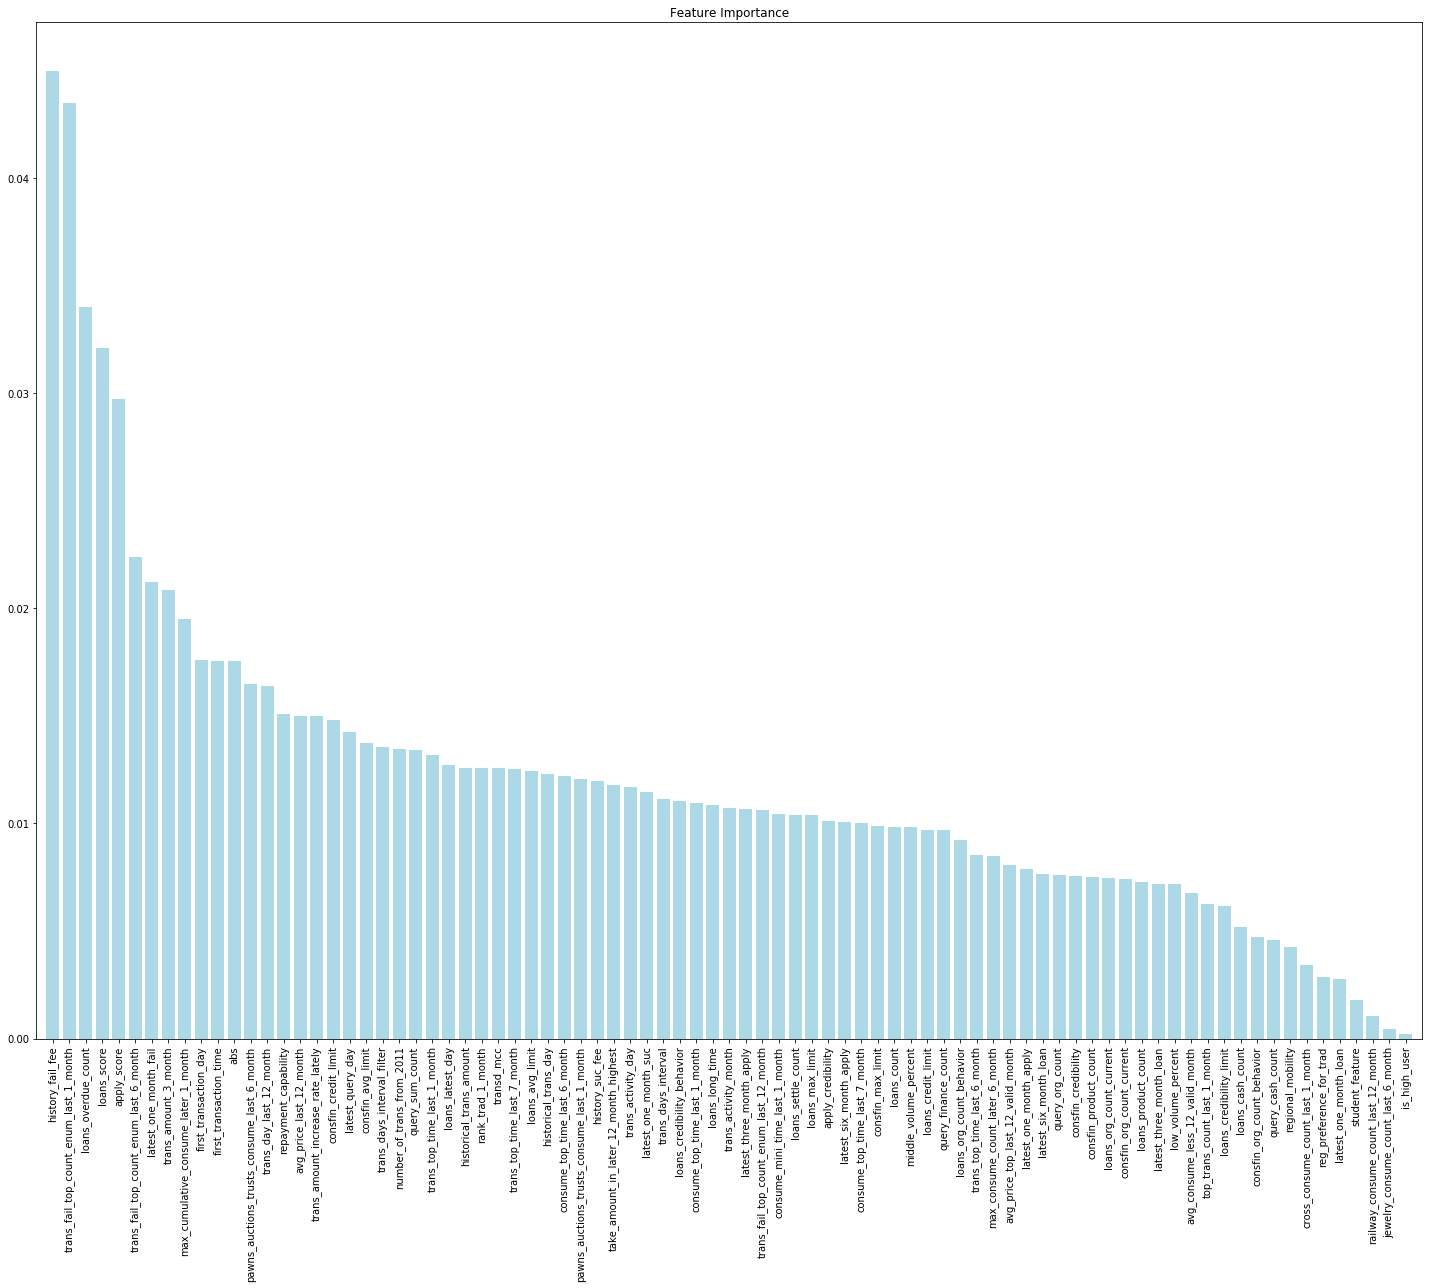

In [18]:
#from sklearn.ensemble import RandomTreesEmbedding
from sklearn.ensemble import RandomForestClassifier
#forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
#importances = forest.feature_importances_
# clf = RandomForestClassifier(n_jobs=2)
# y, _ = pd.factorize(train['species'])
# clf.fit(train[features], y)
# preds = iris.target_names[clf.predict(test[features])]
# pd.crosstab(test['species'], preds, rownames=['actual'], colnames=['preds'])
# clf.feature_importances_

y = df["status"]                                   #获取标签列
X = df.drop("status", axis=1)                      #剩下的所有特征
 
for i in range(10):                           #这里我们进行十次循环取交集
    tmp = set()
    rfc = RandomForestClassifier(n_jobs=-1)
    rfc.fit(X, y)
    print("training finished")
 
    importances = rfc.feature_importances_
    indices = np.argsort(importances)[::-1]   # 降序排列
    for f in range(X.shape[1]):
        if f < 50:                            #选出前50个重要的特征
            tmp.add(X.columns[indices[f]])
        #print("%2d) %-*s %f" % (f + 1, 30, X.columns[indices[f]], importances[indices[f]]))
#     selected_feat_names&=tmp
#     print(len(selected_feat_names), "features are selected")
plt.figure(figsize=(20,18))   
plt.title("Feature Importance")
plt.bar(range(X.shape[1]),
        importances[indices],
        color='lightblue',
        align='center')
plt.xticks(range(X.shape[1]),
           X.columns[indices],
           rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
